In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [289]:
start_year = 2012
end_year = 2021
df_by_year = {}
for cur_year in range(start_year, end_year + 1):
    df_by_year[cur_year] = pd.read_csv(f"./by_year/{cur_year}.csv")

In [291]:
numeric_columns = ['USNEWSRANK', 'RETENTION', 'STUFACR', 'FTCT', 'COHORT', 'GRADS', 'GRRATE', 'PELLCOHORT', 'PELLGRADS', 'PELLGRRATE', 'FACFT', 'FACTOT', 'FTPCT', 'AVGSAL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 'ACTCM75', 'ADMSSN', 'APPLCN', 'ACPTRT', 'EINSTRUCTIONAL', 'ERESEARCH', 'EPUBLIC', 'EACADEMIC', 'ESTUDENT', 'EINSTITUTIONAL', 'ENDOWMENT']

In [292]:
df_2021 = df_by_year[2021]
df_numeric = df_2021[numeric_columns]
c_mat = df_numeric.corr()

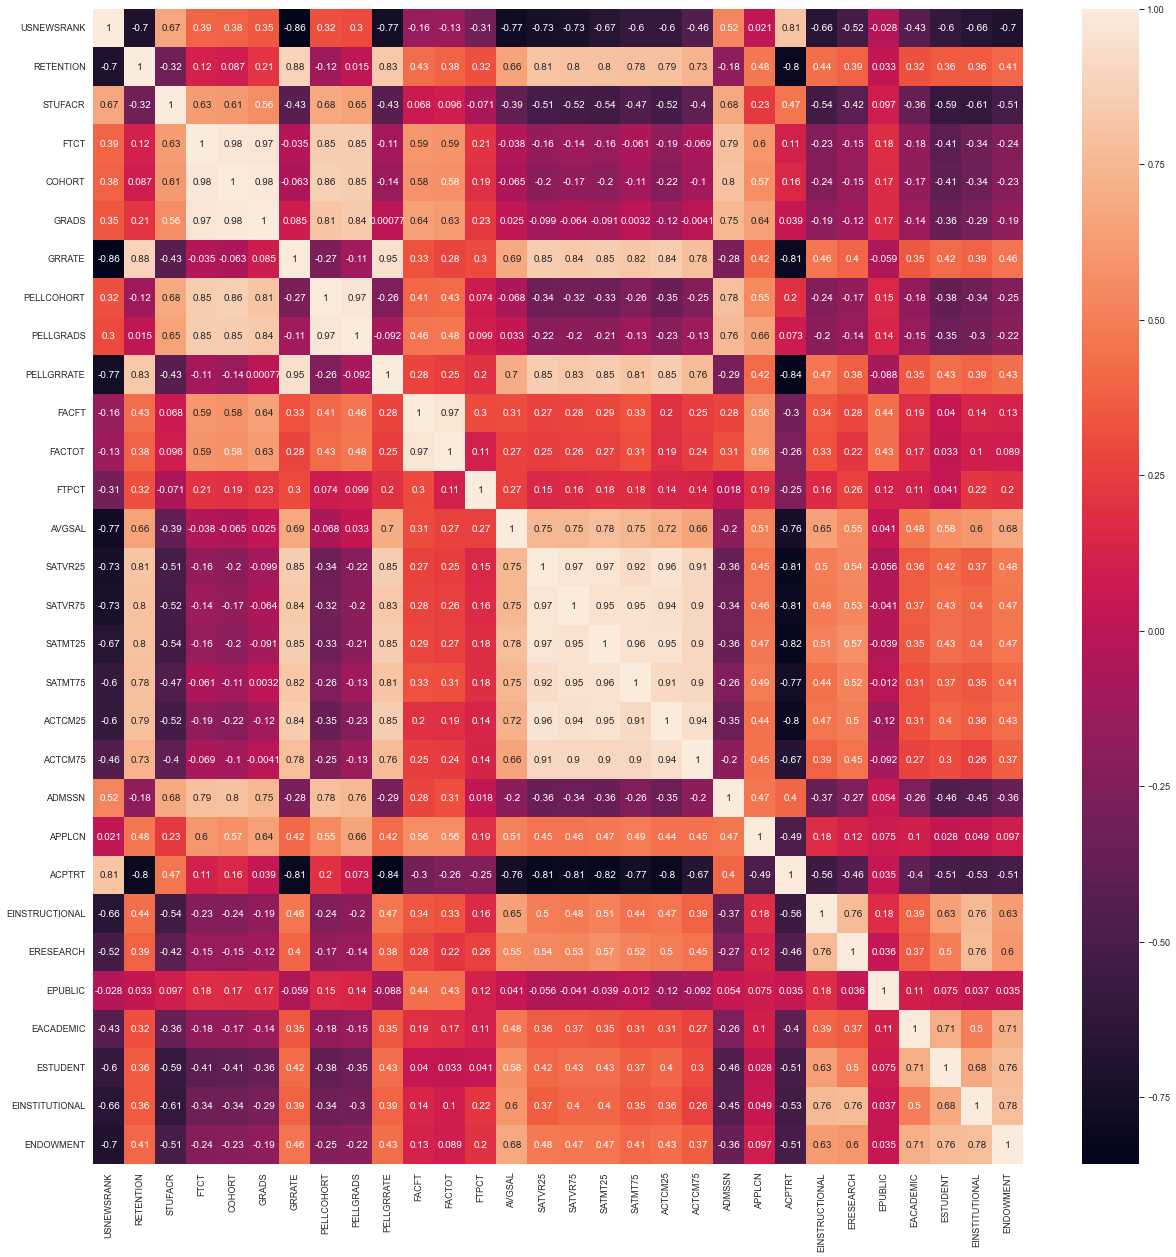

In [293]:
sns.set(rc={'figure.figsize':(25,25)})
plt.rcParams['figure.dpi'] = 60
sns.heatmap(c_mat, annot=True)
plt.show()

In [299]:
df_merged = []
for cur_year in range(start_year, end_year + 1):
    cur_df = df_by_year[cur_year].copy()
    cur_df["YEAR"] = cur_year
    df_merged.append(cur_df)
df_merged = pd.concat(df_merged)

In [307]:
comparison_universities = [
    "Rice University",
    "Harvard University",
    "Yale University",
    "Cornell University",
    "University of Michigan-Ann Arbor"
]

In [308]:
comp_df = df_merged[df_merged.INSTNM.isin(comparison_universities)][["YEAR", "INSTNM"] + numeric_columns]

In [342]:
rice_df = comp_df[comp_df.INSTNM == "Rice University"]
c_mat_rice = rice_df[numeric_columns + ["ETOTAL"]].corr()

In [309]:
comp_df["ETOTAL"] = comp_df['EINSTRUCTIONAL'] + comp_df['ERESEARCH'] + comp_df['EPUBLIC'] + comp_df['EACADEMIC'] + comp_df['ESTUDENT'] + comp_df['EINSTITUTIONAL']
comp_df["LOGENDOWMENT"] = np.log(comp_df["ENDOWMENT"])
comp_df['EXPENDRATIO'] = comp_df["ETOTAL"] / comp_df["ENDOWMENT"]

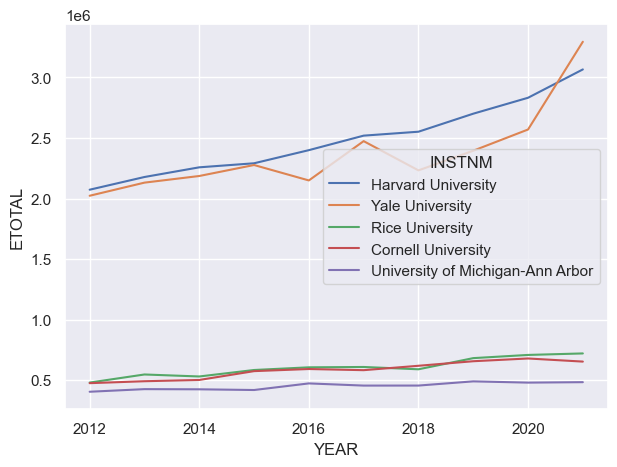

In [311]:
sns.set(rc={'figure.figsize': (7, 5)})
plt.rcParams['figure.dpi'] = 100
sns.lineplot(data=comp_df, x="YEAR", y="ETOTAL", hue="INSTNM");

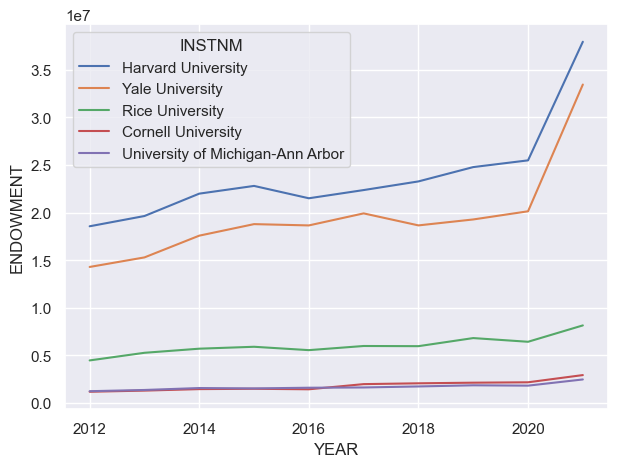

In [312]:
sns.set(rc={'figure.figsize': (7, 5)})
plt.rcParams['figure.dpi'] = 100
sns.lineplot(data=comp_df, x="YEAR", y="ENDOWMENT", hue="INSTNM");

In [288]:
rice_df[["YEAR", "AVGSAL"]]

,YEAR,AVGSAL
15,2017,829509.0
15,2018,826720.0
15,2019,830289.0
15,2020,785466.0
15,2021,879916.0


In [314]:
rice_df = comp_df[comp_df.INSTNM == "Rice University"]
c_mat_rice = rice_df[numeric_columns + ["ETOTAL"]].corr()

<AxesSubplot: xlabel='ETOTAL', ylabel='ENDOWMENT'>

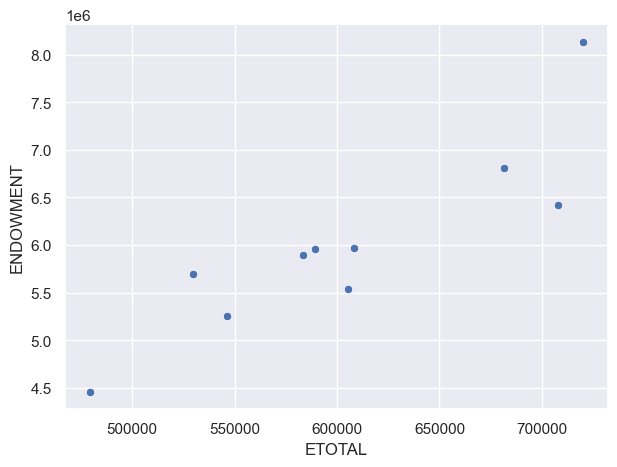

In [315]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.scatterplot(data=rice_df, x="ETOTAL", y="ENDOWMENT")

In [ ]:
df_2021 = df_by_year[2021]
df_numeric = df_2021[numeric_columns]


In [349]:
expenditure_ratios = df_merged[['EINSTRUCTIONAL', 'ERESEARCH', 'EPUBLIC', 'EACADEMIC', 'ESTUDENT', 'EINSTITUTIONAL', 'ENDOWMENT']].groupby(df_merged.UNITID).mean(numeric_only=True)

In [350]:
expenditure_ratios["ETOTAL"] = expenditure_ratios['EINSTRUCTIONAL'] + expenditure_ratios['ERESEARCH'] + expenditure_ratios['EPUBLIC'] + expenditure_ratios['EACADEMIC'] + expenditure_ratios['ESTUDENT'] + expenditure_ratios['EINSTITUTIONAL']

In [351]:
expenditure_ratios["LOGETOTAL"] = np.log(expenditure_ratios["ETOTAL"])
expenditure_ratios["LOGENDOWMENT"] = np.log(expenditure_ratios["ENDOWMENT"])

In [352]:
expenditure_ratios

,EINSTRUCTIONAL,ERESEARCH,EPUBLIC,EACADEMIC,ESTUDENT,EINSTITUTIONAL,ENDOWMENT,ETOTAL,LOGETOTAL,LOGENDOWMENT
UNITID,,,,,,,,,,
100663,1.568311e+05,153045.135974,81893.095310,94503.879143,21428.185085,79640.060411,2.542449e+05,5.873415e+05,13.283362,12.446053
100751,5.131768e+04,10794.376546,7793.485408,14836.864661,8975.453688,16283.272909,1.187595e+05,1.100011e+05,11.608246,11.684855
100858,6.161760e+04,36960.123757,23680.168581,20820.293496,7679.727981,18426.207688,1.529129e+05,1.691841e+05,12.038743,11.937624
102049,9.698081e+04,0.000000,4260.624990,13686.841884,32457.827832,22918.467340,3.974530e+05,1.703046e+05,12.045344,12.892832
104151,9.680072e+04,35072.696526,5473.669690,35906.629726,14379.485544,19068.274690,8.360304e+04,2.067015e+05,12.239031,11.333835
...,...,...,...,...,...,...,...,...,...,...
239105,6.359792e+04,15520.144831,2562.533829,31082.020608,30804.422308,37648.134792,3.156180e+05,1.812152e+05,12.107440,12.662288
240444,9.384284e+04,155576.463991,31608.012448,31876.819947,19372.943212,15396.711861,5.519519e+05,3.476738e+05,12.759020,13.221216
243744,1.011180e+06,653107.639243,0.000000,97664.108268,125291.039166,309102.170482,1.464471e+07,2.196345e+06,14.602305,16.499590


In [353]:
expenditure_ratios["IS_RICE"] = expenditure_ratios.index == 227757

<AxesSubplot: xlabel='LOGENDOWMENT', ylabel='LOGETOTAL'>

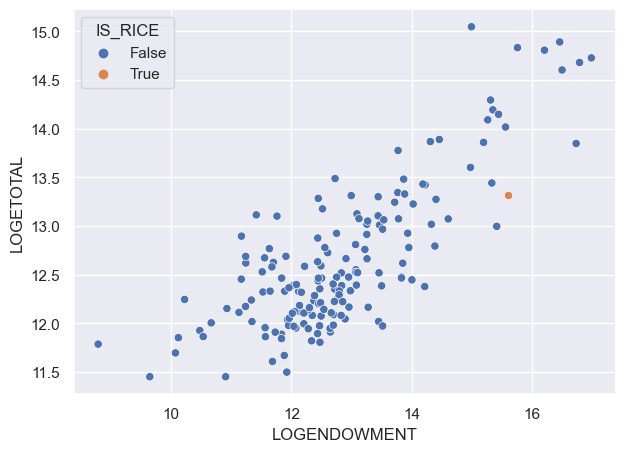

In [354]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.scatterplot(data=expenditure_ratios, x="LOGENDOWMENT", y="LOGETOTAL", hue="IS_RICE")

<AxesSubplot: xlabel='ENDOWMENT', ylabel='ETOTAL'>

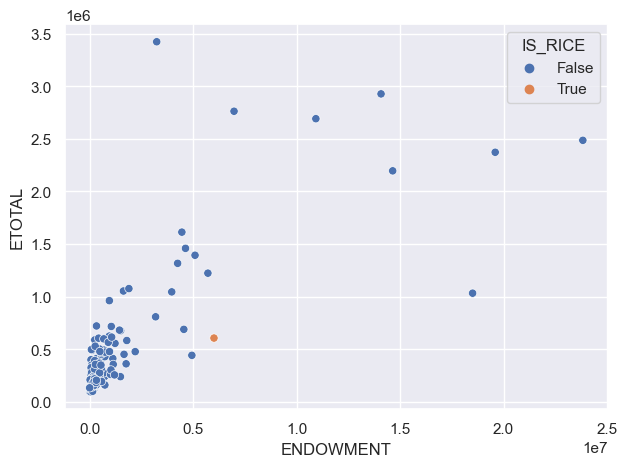

In [355]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.scatterplot(data=expenditure_ratios, x="ENDOWMENT", y="ETOTAL", hue="IS_RICE")